In [11]:
import torch
import torchvision
from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
# Download and load the training data
trainset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

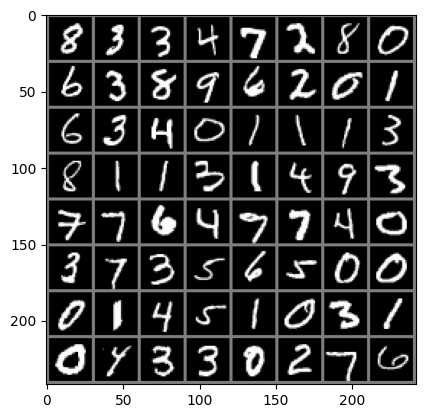

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Get a batch of training data
dataiter = iter(trainloader)
images, labels = next(dataiter)
# Function to show an image
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()
# Show images
imshow(torchvision.utils.make_grid(images))

In [25]:
images.shape

torch.Size([64, 1, 28, 28])

In [35]:
import torch.nn as nn
import torch.nn.functional as F

# design a simple autoencoder model, where the encoder are CNN and the decoder are fully connected layers
# the imput are 28*28=784, and the output are also 784
class Encoder(nn.Module):
    def __init__(self):
        super(Encoder, self).__init__()
        self.fc1 = nn.Linear(784, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 12)
        self.fc4 = nn.Linear(12, 3)
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        return x
    
# class CNNEncoder(nn.Module):
#     def __init__(self):
#         super(Encoder, self).__init__()
#         self.conv1 = nn.Conv2d(1, 16, 3, stride=2, padding=1)  # 1*28*28 -> 16*14*14
#         self.conv2 = nn.Conv2d(16, 32, 3, stride=2, padding=1)  # 16*14*14 -> 32*7*7
#         self.conv3 = nn.Conv2d(32, 64, 7)  # 32*7*7 -> 64*1*1
#         self.fc = nn.Linear(64, 3)
#     def forward(self, x):
#         x = F.relu(self.conv1(x))
#         x = F.relu(self.conv2(x))
#         x = F.relu(self.conv3(x))
#         x = x.view(x.size(0), -1)  # flatten
#         x = self.fc(x)
#         return x
    
class Decoder(nn.Module):
    def __init__(self):
        super(Decoder, self).__init__()
        self.fc1 = nn.Linear(3, 12)
        self.fc2 = nn.Linear(12, 64)
        self.fc3 = nn.Linear(64, 128)
        self.fc4 = nn.Linear(128, 784)
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        return x
    
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = Encoder()
        self.decoder = Decoder()
    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x
    
model = Autoencoder()

In [46]:
import torch.optim as optim

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
epochs = 500
for epoch in range(epochs):
    running_loss = 0.0
    for images, _ in trainloader:
        images = images.view(images.size(0), -1)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, images)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f"Epoch {epoch+1}, Loss: {running_loss/len(trainloader)}")

Epoch 1, Loss: 0.9023550250636998
Epoch 2, Loss: 0.9027147155199478
Epoch 3, Loss: 0.90351974157128
Epoch 4, Loss: 0.9038479100666574
Epoch 5, Loss: 0.9040250259040515
Epoch 6, Loss: 0.9030068677498587
Epoch 7, Loss: 0.904096629510302
Epoch 8, Loss: 0.9034824086023546
Epoch 9, Loss: 0.9027652070085123
Epoch 10, Loss: 0.9024191251568703
Epoch 11, Loss: 0.903206763745371
Epoch 12, Loss: 0.9032314414027404
Epoch 13, Loss: 0.9028980127656892
Epoch 14, Loss: 0.9028338261885938
Epoch 15, Loss: 0.90318289297476
Epoch 16, Loss: 0.9029857406992394
Epoch 17, Loss: 0.9033464260701177
Epoch 18, Loss: 0.9029728036953696
Epoch 19, Loss: 0.9033596539802389
Epoch 20, Loss: 0.9032748261494423
Epoch 21, Loss: 0.9035314022859277
Epoch 22, Loss: 0.9033134465914037
Epoch 23, Loss: 0.9035960421252098
Epoch 24, Loss: 0.9040833351327412
Epoch 25, Loss: 0.9042381230574935
Epoch 26, Loss: 0.9038367729578445
Epoch 27, Loss: 0.9032892490119568
Epoch 28, Loss: 0.9035613423725689
Epoch 29, Loss: 0.9033470156350369


In [ ]:
import torch.optim as optim

# Check if GPU is available
model_gpu = Autoencoder()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_gpu.to(device)

# Define loss function and optimizer
criterion_gpu = nn.MSELoss()
optimizer_gpu = optim.Adam(model.parameters(), lr=0.001)

# Training loop
epochs = 500
for epoch in range(epochs):
    running_loss = 0.0
    for images, _ in trainloader:
        images = images.view(images.size(0), -1).to(device)
        optimizer_gpu.zero_grad()
        outputs = model_gpu(images)
        loss = criterion_gpu(outputs, images)
        loss.backward()
        optimizer_gpu.step()
        running_loss += loss.item()
    print(f"Epoch {epoch+1}, Loss: {running_loss/len(trainloader)}")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


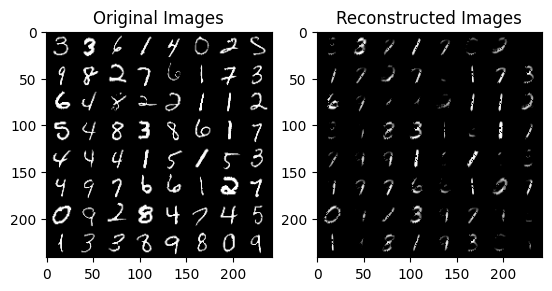

In [38]:
# Get a batch of test data
testset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)
test_dataiter = iter(testloader)
test_images, _ = next(test_dataiter)

# Pass the test images through the autoencoder
test_images_flattened = test_images.view(test_images.size(0), -1)
reconstructed_images = model(test_images_flattened)

# Function to show original and reconstructed images
def show_images(original, reconstructed):
    fig, axes = plt.subplots(1, 2)
    axes[0].imshow(np.transpose(torchvision.utils.make_grid(original).numpy(), (1, 2, 0)))
    axes[0].set_title('Original Images')
    axes[1].imshow(np.transpose(torchvision.utils.make_grid(reconstructed.view(-1, 1, 28, 28)).detach().numpy(), (1, 2, 0)))
    axes[1].set_title('Reconstructed Images')
    plt.show()

# Show original and reconstructed images
show_images(test_images, reconstructed_images)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


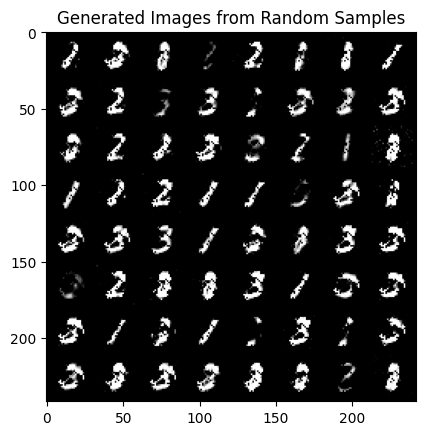

In [44]:
# Generate a grid of random samples
random_samples = torch.randn(64, 3)
random_samples = (random_samples - random_samples.mean(dim=0)) / random_samples.std(dim=0)

# Pass the random samples through the decoder
generated_images = model.decoder(random_samples)

# Reshape the generated images to 28x28
generated_images = generated_images.view(64, 1, 28, 28)

# Show the generated images in an 8x8 grid
grid_img = torchvision.utils.make_grid(generated_images, nrow=8)
plt.imshow(grid_img.permute(1, 2, 0).detach().numpy(), cmap='gray')
plt.title('Generated Images from Random Samples')
plt.show()